In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [6]:
from xgboost import XGBClassifier

In [5]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


Setup this one to make sure the shell will not die when running **XGB**

In [8]:
from sklearn import preprocessing

In [7]:
train_dat=pd.read_csv("/Users/StevenTseng/Desktop/Data Analytics/Kaggle/titanic.dataset/train.csv")
test_dat=pd.read_csv("/Users/StevenTseng/Desktop/Data Analytics/Kaggle/titanic.dataset/test.csv")
all=[train_dat,test_dat]


In [9]:
onehot_enc=preprocessing.OneHotEncoder()
encode_sex=onehot_enc.fit_transform(all[0]['Sex'])


NameError: name 'preprocessing' is not defined

In [11]:
type(all[0]['Sex'])

pandas.core.series.Series

In [10]:
#Factorial Variables
train_dat.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"O'Dwyer, Miss. Ellen ""Nellie""",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [11]:
#Quantitive Variables
train_dat.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
train_dat[["Pclass","Survived"]].groupby("Pclass",as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
train_dat[["Sex","Survived"]].groupby("Sex",as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
train_dat[["Parch","Survived"]].groupby("Parch",as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


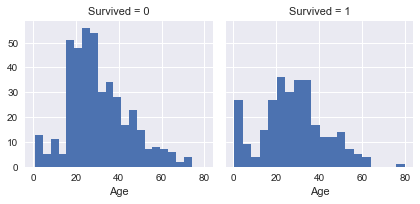

In [17]:
g = sns.FacetGrid(train_dat, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()


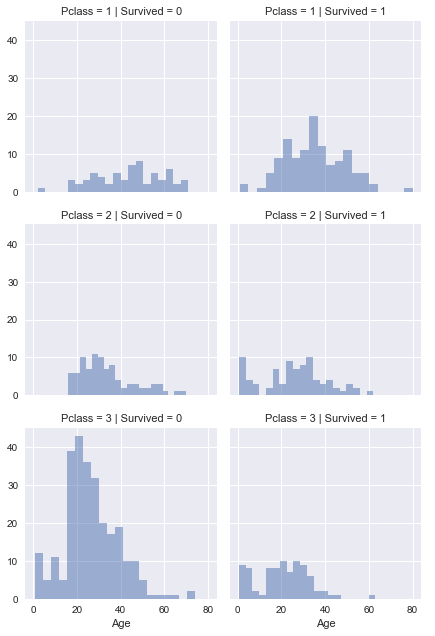

In [18]:
grid = sns.FacetGrid(train_dat, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();plt.show()


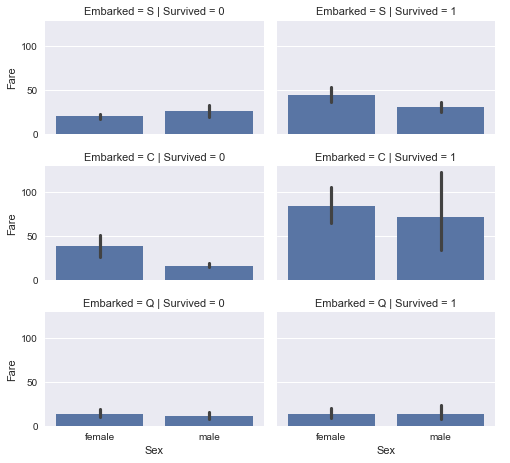

In [19]:
grid = sns.FacetGrid(train_dat, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare')
grid.add_legend();plt.show()


In [20]:
train_dat = train_dat.drop(['Ticket', 'Cabin'], axis=1)
test_dat = test_dat.drop(['Ticket', 'Cabin'], axis=1)

In [21]:
train_dat["Title"]=train_dat.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_dat["Title"]=test_dat.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [22]:
train_dat["Title"]=train_dat["Title"].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],"Rare")
train_dat["Title"]=train_dat['Title'].replace(["Mme","Mlle","Ms"],"Miss")

In [23]:
test_dat["Title"]=test_dat["Title"].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],"Rare")
test_dat["Title"]=test_dat['Title'].replace(["Mme","Mlle","Ms"],"Miss")

In [24]:
pd.crosstab(test_dat['Title'],test_dat["Sex"])

Sex,female,male
Title,,
Master,0,21
Miss,79,0
Mr,0,240
Mrs,72,0
Rare,1,5


In [25]:
all=[train_dat,test_dat]

In [26]:
#mappping the Title

title_mapping={'Mr': 1, 'Mrs':3, 'Miss':2, 'Master':4, 'Rare':5}
for dataset in all:
    dataset['Title']= dataset['Title'].map(title_mapping)
    dataset["Title"]=dataset["Title"].fillna(0)

In [27]:
all[0]=all[0].drop(["Name","PassengerId"],axis=1)
all[1]=all[1].drop("Name",axis=1)


In [28]:
#mappping the Sex
sex_mapping={"male":0,"female":1}
for dataset in all:
    dataset["Sex"]=dataset["Sex"].map(sex_mapping).astype(int)


In [29]:
#Missing Value

all[0].apply(lambda x : sum(x.isnull()),axis=0)
[all[0].shape,all[1].shape]

[(891, 9), (418, 9)]

In [30]:
#Age

guess_ages = np.zeros((2,3))
guess_ages



array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [31]:
for dataset in all:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)


In [32]:
train_dat["AgeBand"]=pd.cut(train_dat["Age"],5)
train_dat[["AgeBand","Survived"]].groupby(by="AgeBand").mean()

,Survived
AgeBand,
"(0.34, 16.336]",0.550000
"(16.336, 32.252]",0.369942
"(32.252, 48.168]",0.404255
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909


In [33]:
for dataset in all:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
all[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [34]:
for dataset in all:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1


all[0][["FamilySize","Survived"]].groupby(by="FamilySize").mean().sort_values(by="Survived",ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [35]:
# Variable : "Alone"
for dataset in all:
    dataset["Isalone"]=0
    dataset.loc[dataset["FamilySize"]==1,"Isalone"]=1


In [36]:
#Fill values in Embarked

for dataset in all:
    dataset['Embarked'] = dataset['Embarked'].fillna("S")
    

all[0][["Embarked","Survived"]].groupby(by="Embarked").mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [37]:
for dataset in all:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

all[0].head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Isalone
0,0,3,0,1,1,0,7.2500,0,1,2,0
1,1,1,1,2,1,0,71.2833,1,3,2,0
2,1,3,1,1,0,0,7.9250,0,2,1,1
3,1,1,1,2,1,0,53.1000,0,3,2,0
4,0,3,0,2,0,0,8.0500,0,1,1,1


In [38]:
#Fill values in Fare


all[1]["Fare"].fillna(all[1]["Fare"].median(),inplace=True)

In [39]:
for dataset in all:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)



In [40]:
[all[0].columns,all[1].columns]

[Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
        'Embarked', 'Title', 'FamilySize', 'Isalone'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
        'Embarked', 'Title', 'FamilySize', 'Isalone'],
       dtype='object')]

In [41]:
x_train=all[0].drop("Survived",axis=1)
y_train=all[0]["Survived"]
x_test=all[1].drop("PassengerId",axis=1)

[x_train.shape,y_train.shape,x_test.shape]

[(891, 10), (891,), (418, 10)]

In [42]:
#LogisticRegression

Logreg=LogisticRegression()

Logreg.fit(x_train,y_train)

Y_pred=Logreg.predict(x_test)

acc_log = round(Logreg.score(x_train, y_train) * 100, 2)

In [43]:
corr_df=pd.DataFrame({"Feature":all[0].columns.delete(0)})

corr_df["Coef"]=pd.Series(Logreg.coef_[0])

corr_df.sort_values(by="Coef",ascending=False)

,Feature,Coef
1,Sex,2.142168
7,Title,0.460481
6,Embarked,0.262875
5,Fare,0.215838
4,Parch,-0.033903
2,Age,-0.034740
3,SibSp,-0.227744
8,FamilySize,-0.264554
9,Isalone,-0.511495
0,Pclass,-0.699474


In [44]:
#Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
acc_rf = round(random_forest.score(x_train, y_train) * 100, 2)

acc_rf

89.109999999999999

In [45]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree



89.109999999999999

In [46]:
# XGBoost

xgc=XGBClassifier()


In [ ]:
xgc.fit(x_train,y_train)
Y_pred_xg=xgc.predict(x_test)
acc_xgc=round(xgc.score(x_train,y_train)*100,2)

In [41]:
models = pd.DataFrame(
{"Model":["Logis","Random Forest","Decision Tree","XGBoost"],
"Score":[acc_log,acc_rf,acc_decision_tree,acc_xgc]
         }
)

models

,Model,Score
0,Logis,80.25
1,Random Forest,89.11
2,Decision Tree,89.11
3,XGBoost,85.41


In [42]:
submission = pd.DataFrame({
        "PassengerId": all[1]["PassengerId"],
        "Survived": Y_pred
    })


In [45]:
submission.to_csv("/Users/StevenTseng/Desktop/Data Analytics/Kaggle/titanic.dataset/submission.csv",index=False)